# Part 2
## Double Deep Q-learning

As before with the tabular Q-learning (part 1 of this tutorial), Double Deep Q-learning seeks to learn the "quality" function $Q(s,a)$. The difference in this case is that instead of using a table to store all the values of Q(s,a), we are going to use a Neural Network to approximate the unknown function $Q(s,a)$.

# Understanding Neural Networks

Before we dive into the details of how Double Deep Q-learning works, let us first gain some intuition on how Neural Networks work.

### A single neuron neural network

![](imgs/nn_v1.png)

Neural networks can be seen as differentiable graphs where information can flow in two ways: forward way and backward way. For instance, consider the one neuron neural network shown in the figure. Here, the information flowing in the forward way is shown in color blue, and the information flowing in the backward way is shown in color red.

The forward way, or forward pass, is used to perform a series of math operations on the flowing information. This math operations are determined by the structure of the network (i.e. the connections, the activation functions, etc.) and the parameters of the network (i.e. weights and biases). On the other hand, the backward way, or backward pass, is used to distribute gradients of errors that will be used to update the parameters of the network, and hence, train the network to approximate a desired unknown function.

The process of training a neural network can be summarized in the following steps:
* 1. Feedforward an input of data (forward pass).
* 2. Compute a loss between the network's output and the desired output.
* 3. Backpropagate the gradient of the loss w.r.t each of the parameters of the network (backward pass).
* 4. Use an optimization algorithm (i.e. gradient descent) to update the parameters.

These steps are repeated until a stop criterion is met.

Lets derive the expressions for a single iteration of these steps.

##### Step 1: forward pass
Assume the network receives an input of the form: $\color{blue}{X} = [\color{blue}{x_1},\color{blue}{x_2},\color{blue}{x_3}]^T$. Then, the feedforward equations are:

\begin{equation}
    \color{blue}q = w_1\color{blue}{x_1} + w_2\color{blue}{x_2} + w_3\color{blue}{x_3} + b = \left[\begin{array}{ccc}w_1&w_2&w_3\end{array}\right]\left[\color{blue}{\begin{array}{c}x_1\\
    x_2\\
    x_3\end{array}}\right] + b = W\color{blue}X + b
\end{equation}
\begin{equation}
    \color{blue}z = f(\color{blue}q) = f(W\color{blue}X + b)
\end{equation}

##### Step 2: compute the loss
Asume that the desired output for the received input $\color{blue}X$ is $\hat{z}$, and assume that our loss function is the squared error. Then, the loss $L$ is:

\begin{equation}
    L = \frac{1}{2}\big(\hat{z}-\color{blue}z\big)^2
\end{equation}

##### Step 3: backpropagate the gradient of the loss
In this step we need to compute the gradient of the loss with respect to each of the (trainable) parameters of the network. To do so we use the backpropagation algorithm (this is a fancy name for the calculus chain rule).

\begin{equation}
    \color{red}{\nabla_zL} = \color{red}{\frac{\partial L}{\partial z}} = -(\hat{z}-\color{blue}z)
\end{equation}

\begin{equation}
    \color{red}{\nabla_qL} = \color{red}{\frac{\partial z}{\partial q}}\color{red}{\frac{\partial L}{\partial z}} = f'(\color{blue}q)\color{red}{\nabla_zL}
\end{equation}

Apliying this same on the weight gates we find that:

\begin{equation}
    \color{red}{\nabla_{w_1}L} = \color{blue}{x_1}\color{red}{\nabla_qL}
\end{equation}
\begin{equation}
    \color{red}{\nabla_{w_2}L} = \color{blue}{x_2}\color{red}{\nabla_qL}
\end{equation}
\begin{equation}
    \color{red}{\nabla_{w_3}L} = \color{blue}{x_3}\color{red}{\nabla_qL}
\end{equation}
\begin{equation}
    \color{red}{\nabla_bL} = \color{red}{\nabla_qL}
\end{equation}

#### Step 4: update the weights
In this simple example we will use vanilla gradient descent to update the weights. Here $\alpha$ denotes the learning rate.

\begin{equation}
    w_1 = w_1 - \alpha\color{red}{\nabla_{w_1}L}
\end{equation}
\begin{equation}
    w_2 = w_2 - \alpha\color{red}{\nabla_{w_2}L}
\end{equation}
\begin{equation}
    w_3 = w_3 - \alpha\color{red}{\nabla_{w_3}L}
\end{equation}


These steps are repeated until a desired performance or stop criterion is achieved. 

It is important to notice that the gradient can be computed also w.r.t the inputs of the neuron. For instance:

\begin{equation}
    \color{red}{\nabla_{x_1}L} = w_1\color{red}{\nabla_qL}
\end{equation}
\begin{equation}
    \color{red}{\nabla_{x_2}L} = w_2\color{red}{\nabla_qL}
\end{equation}
\begin{equation}
    \color{red}{\nabla_{x_3}L} = w_3\color{red}{\nabla_qL}
\end{equation}

## A multi-layer neural network
In our single neuron example we assumed that the input of the neuron was a vector of data. However, the input of the neuron could also be the output of a previous layer in the network, and the gradients w.r.t the input would be the gradients backproagating to the previous layer. Once one understands this, it is straightforward to extrapolate the training procedure to networks with multiple layers and neurons.

Consider the 2 layer neural network in the following figure:

![](imgs/nn_v2.png)

In this network each layer is a group of neurons and each of these neurons has its own set of weights and biases. Also, each neuron in one layer is connected to all the outputs of the previous layer. For example, in the case of the layer 1, each neuron is connected to every input $(\color{blue}X)$, and, in the case of layer 2, each neuron is connected to each output of the layer 1 $(\color{blue}Y)$.


The training procedure is exactly the same as with the one neuron neural network, the only change is in the size of the matrices.


For instance consider receiving an input matrix $\color{blue}X$ of size $d\times m$. Here $d$ is the dimension of the input examples (i.e. in our one-neuron network example $d$ was $3$) and $m$ is the number of examples that we are going to feedforward to the network per training iteration (i.e. in our one-neuron network example $m$ was $1$). The term $m$ is known as the batch size and using $m>1$ usually allows faster and smoother training. Consider also a first layer with $n_1$ neurons and a second layer (output layer) with $n_2$ neurons. Under these asumptions the dimensions of the different matrices are:

\begin{equation}
        \color{blue}X \rightarrow d\times m
\end{equation}

\begin{equation}
        W_1 \rightarrow n_1\times d
\end{equation}

\begin{equation}
        B_1 \rightarrow n_1\times 1
\end{equation}

\begin{equation}
        W_2 \rightarrow n_2\times n_1
\end{equation}

\begin{equation}
        B_2 \rightarrow n_2\times 1
\end{equation}

##### Forward pass
Assuming activation functions $f_1$ and $f_2$ for the layers 1 and 2 respectively, the forward pass equations are:

\begin{equation}
    \color{blue}Y = f_1(W_1\color{blue}X + B_1) \rightarrow n_1 \times m
\end{equation}

\begin{equation}
    \color{blue}Z = f_2(W_2\color{blue}Y + B_2) \rightarrow n_2 \times m
\end{equation}

##### Compute the loss

The loss function in this case is again defined as the Squared Error between the desired output and the actual output of the network. However, notice that in this case the error is divided by the batch size $m$, thats an usual thing to do and it leads to the Mean Squared Error criterion. In this loss function all the operations are performed elementwise.


\begin{equation}
    L = \frac{1}{2m}\big(\hat{Z}-\color{blue}Z\big)^2 \rightarrow n_2 \times m
\end{equation}

##### Backward pass

As before, we backpropagate the gradient of the loss.

The gradient at the output of layer 2 is:

\begin{equation}
    \color{red}{\nabla_ZL} = \color{red}{\frac{\partial L}{\partial Z}} = -\frac{1}{m}(\hat{Z}-\color{blue}Z) \rightarrow n_2 \times m
\end{equation}

As before, we can compute an intermediate gradient inside the neurons of layer 2 (as with the $\color{blue}{q}$ term in the single neuron example. This is done for efficiency). Here $*$ denotes elementwise multiplication.

\begin{equation}
    \color{red}{\nabla_{Q_2}L} =  f_2'(W_2\color{blue}Y + B_2) * \color{red}{\nabla_ZL} \rightarrow n_2 \times m
\end{equation}

Then:

\begin{equation}
    \color{red}{\nabla_{Y}L} =  W_2^T\color{red}{\nabla_{Q_2}L}  \rightarrow n_1 \times m
\end{equation}

\begin{equation}
    \color{red}{\nabla_{W_2}L} =  \color{red}{\nabla_{Q_2}L}\color{blue}Y^T  \rightarrow n_2 \times n_1
\end{equation}

\begin{equation}
    \color{red}{\nabla_{B_2}L} =  \sum_{m}\color{red}{\nabla_{Q_2}L}  \rightarrow n_2 \times 1
\end{equation}

where $\sum_{m}$ denotes summation over the $m$ columns (along the batch).

Following the same ideas for layer 1 we get:

\begin{equation}
    \color{red}{\nabla_{Q_1}L} =  f_1'(W_1\color{blue}X + B_1) * \color{red}{\nabla_YL} \rightarrow n_1 \times m
\end{equation}

Then:

\begin{equation}
    \color{red}{\nabla_{X}L} =  W_1^T\color{red}{\nabla_{Q_1}L}  \rightarrow d \times m
\end{equation}

\begin{equation}
    \color{red}{\nabla_{W_1}L} =  \color{red}{\nabla_{Q_1}L}\color{blue}X^T  \rightarrow n_1 \times d
\end{equation}

\begin{equation}
    \color{red}{\nabla_{B_1}L} =  \sum_{m}\color{red}{\nabla_{Q_1}L}  \rightarrow n_1 \times 1
\end{equation}


##### Update the parameters:

For simplicity we again stick to vanilla gradient descent:

\begin{equation}
    W_1 = W_1 - \alpha\color{red}{\nabla_{W_1}L}
\end{equation}

\begin{equation}
    B_1 = B_1 - \alpha\color{red}{\nabla_{B_1}L}
\end{equation}

\begin{equation}
    W_2 = W_2 - \alpha\color{red}{\nabla_{W_2}L}
\end{equation}

\begin{equation}
    B_2 = B_2 - \alpha\color{red}{\nabla_{B_2}L}
\end{equation}




# Lets code a two layer neural network!

As a toy example let us train a two layer neural network to overfit on the following data:

* $X \rightarrow \hat{Z}$
* [0,0,1] = 1
* [0,1,0] = 2
* [0,1,1] = 3
* [1,0,0] = 4
* [1,0,1] = 5

In this case we can see that $d=3$ and $m=5$. Also, it is required that $n_2=1$ (to match the dimension of the output).

Let us define $n_1=7$ and lets use sigmoid activation function in layer 1 and a linear activation function in layer 2.

The sigmoid function is given by:

\begin{equation}
    \sigma(x) = \frac{1}{1+e^{(-x)}}
\end{equation}

Notice that:

\begin{equation}
    \sigma'(x) = \sigma(x)(1-\sigma(x))
\end{equation}


In [1]:
import numpy as np                 # Standar python module for matrix and vector operations.
np.random.seed(1234)               # Fix random seed for reproducibility.

#======================= DEFINE THE DATA ============================
X = np.array([[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1]]).T    # Input examples. Shape: (d x m)
Z_hat = np.array([[1],[2],[3],[4],[5]]).T                    # Desired outputs. Shape: (n2 x m)

#======================= DEFINE THE SIZES ============================
d = 3                              # Dimension of input examples.
m = 5                              # Number of input examples (batch_size).
n1 = 10                            # Number of neurons in layer 1.
n2 = 1                             # Number of neurons in layer 2.
alpha = 0.1                        # Learning rate for gradient descent.


#======================= INITIALIZE WEIGHTS ============================
W1 = 2.0*np.random.random((n1,d)) - 1.0     # Uniformly distributed (-1,1). Shape: (n1 x d)
B1 = 2.0*np.random.random((n1,1)) - 1.0     # Uniformly distributed (-1,1). Shape: (n1 x 1)
W2 = 2.0*np.random.random((n2,n1)) - 1.0    # Uniformly distributed (-1,1). Shape: (n2 x n1)
B2 = 2.0*np.random.random((n2,1)) - 1.0     # Uniformly distributed (-1,1). Shape: (n2 x 1)


#======================= DEFINE ACTIVATION FUNCTIONS ======================
def sigmoid(x,deriv=False):                 # The deriv condition allows us to define also the f' function.
    if not deriv:
        return 1.0/(1.0+np.exp(-x))         # Here x is the input to the sigmoid in the forward pass.
    else:
        return x*(1.0-x)                    # Here x is the output of the sigmoid in the forward pass.
    
def linear(x,deriv=False):                  # The deriv condition allows us to define also the f' function.
    if not deriv:
        return x                            # Here x is the input to the sigmoid in the forward pass.
    else:
        return 1.0                          # The derivate (slope) is always 1 regardless of the input x.


#======================= TRAIN THE NETWORK ============================
max_iterations = 1000                        # Number of iterations to train.
for iteration in range(max_iterations+1):    # Loop over the iterations.
    
    # FORWARD PASS
    Y = sigmoid(np.dot(W1,X)+B1)             # Layer 1 output. Shape: (n1 x m)
    Z = linear(np.dot(W2,Y)+B2)              # Layer 2 output. Shape: (n2 x m)
    
    # COMPUTE LOSS
    L = np.square(Z_hat-Z)/(2.0*m)            # Loss. Shape: (n2 x m)
    
    # BACKWARD PASS
    grad_Z = -(Z_hat-Z)/m                              # Gradient of L w.r.t Z.                 Shape: (n2 x m)
    grad_Q2 = linear(Z,deriv=True)*grad_Z              # Intermeadiate gradient inside layer 2. Shape: (n2 x m)
    grad_Y = np.dot(W2.T,grad_Q2)                      # Gradient of L w.r.t Y.                 Shape: (n1 x m)
    grad_W2 = np.dot(grad_Q2,Y.T)                      # Gradient of L w.r.t W2.                Shape: (n2 x n1)
    grad_B2 = np.sum(grad_Q2,axis=1).reshape(n2,1)     # Gradient of L w.r.t B2.                Shape: (n2 x 1)
    
    grad_Q1 = sigmoid(Y,deriv=True)*grad_Y             # Intermeadiate gradient inside layer 1. Shape: (n1 x m)
    grad_X = np.dot(W1.T,grad_Q1)                      # Gradient of L w.r.t X.                 Shape: (d x m)
    grad_W1 = np.dot(grad_Q1,X.T)                      # Gradient of L w.r.t W1.                Shape: (n1 x d)
    grad_B1 = np.sum(grad_Q1,axis=1).reshape(n1,1)     # Gradient of L w.r.t B1.                Shape: (n1 x 1)
    
    # UPDATE WEIGHTS
    W1 = W1 - alpha*grad_W1                   # Gradient descent on W1. Shape: (n1 x d)
    B1 = B1 - alpha*grad_B1                   # Gradient descent on B1. Shape: (n1 x 1)
    W2 = W2 - alpha*grad_W2                   # Gradient descent on W2. Shape: (n2 x 1)
    B2 = B2 - alpha*grad_B2                   # Gradient descent on B2. Shape: (n2 x 1)
    
    if(iteration%(max_iterations/10))==0:
        print('Iteration:',iteration,'   Loss:',np.round(L.sum(),4)) # Print training log.

# ============================== TEST THE NETWORK =================================
Y = sigmoid(np.dot(W1,X)+B1)
Z = linear(np.dot(W2,Y)+B2)
print('__________________________')
print('Desired output:')
print(Z_hat[0])
print('Predicted output:')
print(np.round(Z[0],2))

Iteration: 0    Loss: 16.428
Iteration: 100    Loss: 0.3461
Iteration: 200    Loss: 0.1707
Iteration: 300    Loss: 0.0641
Iteration: 400    Loss: 0.0192
Iteration: 500    Loss: 0.0057
Iteration: 600    Loss: 0.0023
Iteration: 700    Loss: 0.0015
Iteration: 800    Loss: 0.0012
Iteration: 900    Loss: 0.001
Iteration: 1000    Loss: 0.0009
__________________________
Desired output:
[1 2 3 4 5]
Predicted output:
[1.   1.96 3.04 4.05 4.94]


## The recipe to train a neural network

In summary the process of training a neural network requires four steps:
* **1.** Propagate input data through the network (forward pass).
* **2.** Compute the loss (the quantity we want to minimize).
* **3.** Backpropagate the error to the network and compute the desired gradients.
* **4.** Update the network parameters with an optimizer (i.e. gradient descent).

# Now, lets dive into Double Deep Q-learning

As we saw in Part 1 of this tutorial, tabular Q-learning seeks to learn a table with $|S|$ rows and $|A|$ columns. In this table each entry is the Q-value of the corresponding state-action pair. In this tabular form the Q-learning update is given by:

\begin{equation}
    Q(s_t,a_t) = Q(s_t,a_t) + \alpha[r_{t+1} + \gamma \max_{\hat{a}}Q(s_{t+1},\hat{a}) - Q(s_t,a_t)]
\end{equation}

We saw that it is straighforward to implement this in code and that we can achieve optimal results. However, the tabular form fails to work when we deal with continuous or very big state spaces (i.e. we wont be able to build the required table).

In order to solve this problem we can approximate the function $Q(s,a)$ with a neural network. In order to do so we need to re-define the update rule in the form of a loss function.

As in tabular Q-learning, the quantity that we want to minimize is the Bellman Error:

\begin{equation}
    BE = r_{t+1} + \gamma \max_{\hat{a}}Q(s_{t+1},\hat{a}) - Q(s_t,a_t)
\end{equation}

Hence, we can define the squared Bellman error as our loss function:

\begin{equation}
    L = \frac{1}{2}\bigg(r_{t+1} + \gamma \max_{\hat{a}}Q(s_{t+1},\hat{a}) - Q(s_t,a_t)\bigg)^2
\end{equation}

We can see that this loss has the exact same shape as the loss function used in our vanilla neural network tutorial:

\begin{equation}
    L = \frac{1}{2}\big(\hat{z} - z\big)^2
\end{equation}

where the target $\hat{z}$ (desired output) is given by:

\begin{equation}
    \hat{z} = r_{t+1} + \gamma \max_{\hat{a}}Q(s_{t+1},\hat{a})
\end{equation}

and the network's output $z$ is given by:

\begin{equation}
    z = Q(s_t,a_t)
\end{equation}

The main difference between the previous supervised learning approach of our vanilla neural network, and the reinforcement learning approach used in this case, is that in the first one we knew the correct desired outputs $\hat{z}$ (we had a list of data with the desired outputs given the inputs), while in the reinforcement learning aproach, the desired output $\hat{z}$, for the state-action pair $(s_t, a_t)$, is a moving target based on the received inmediate reward, and an estimate of the Q-value of the next state that results when taking action $a_t$ at state $s_t$.

The fact that we have a moving target is an undesired property for the stability of the neural network training process. To stabilize the training process, we can use two different neural networks: one to predict $Q(s_t,a_t)$ and one to predict the estimation inside the target: $\max_{\hat{a}}Q(s_{t+1},\hat{a})$. The use of these two distinct neural networks is what gives rise to the name: **Double Deep Q-learning**.

In addition to the use of two neural networks, it is also a common practice to use a replay memory buffer to provide data to the networks while training. This allows for a more efficient use of data and a more stable training process.

The Double Deep Q-learning algorithm can be summarized as follows.

### The Double Deep Q-learning algorithm
![title](imgs/DQN.png)


To understand better the Double Deep Q-learning algorithm lets use it to solve the grid_world of Part 1.

### Import all the required python modules

In [2]:
import numpy as np                                      # Standar libary for matrix/vector operations.
import matplotlib.pyplot as plt                         # Python library to plot and render the environment.
from envs.environments import grid_world                # The grid_world environment.
from agents.Qlearning import double_deep_Qlearning      # A pre-made double_deep_Qlearning agent.
from agents.Qlearning import ReplayBuffer               # A pre-made code for the replay buffer (store and sample data).

In [3]:
np.random.seed(123)

env = grid_world()
dims = [2,15,15,4]

agent = double_deep_Qlearning(dims,learning_rate=0.1)
buffer = ReplayBuffer(100000,2,1)

max_episodes = 500
max_steps = 200
min_buffer_size = 1000
batch_size = 32
loss = np.zeros((4,1))
exp_decay = 0.99
random = False

for episode in range(max_episodes+1):
    state = env.reset(random,True)
    done = False
    step = 1
    
    while(not done and step <= max_steps):
        action = agent.epsilon_greedy(state)
        next_state, reward, done = env.step(action,True)
        buffer.add(state, action, next_state, reward, done)

        state = next_state
        step += 1
        
        if(buffer.size() > min_buffer_size):
            batch = buffer.sample_batch(batch_size)
            loss = agent.train(batch)
            agent.update_target_weights()
    
    agent.epsilon_decay(rate=exp_decay,min=0.1)                # Reduces the exploration parameter epsilon.


    if(episode%(max_episodes/10)==0):                          # This prints some information of the training process
        print('Episode: ',episode,' Steps: ',step,
              ' Exploration: ',np.round(agent._epsilon,2))

Episode:  0  Steps:  201  Exploration:  0.99
Episode:  50  Steps:  178  Exploration:  0.6
Episode:  100  Steps:  27  Exploration:  0.36
Episode:  150  Steps:  19  Exploration:  0.22
Episode:  200  Steps:  41  Exploration:  0.13
Episode:  250  Steps:  16  Exploration:  0.1
Episode:  300  Steps:  25  Exploration:  0.1
Episode:  350  Steps:  28  Exploration:  0.1
Episode:  400  Steps:  23  Exploration:  0.1
Episode:  450  Steps:  141  Exploration:  0.1
Episode:  500  Steps:  20  Exploration:  0.1


<IPython.core.display.Javascript object>


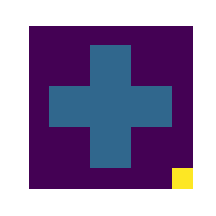

In [4]:
%matplotlib notebook

env = grid_world()

for episode in range(30):
    state = env.reset(random,True)             # Reset the environment.
    done = False                               # done flag starts as false.
    step = 1                                   # step counter starts in 1.
    while (not done and step < 20):            # Looping until terminal or during max steps.
        action = agent.greedy(state)           # Select action based on greedy policy.
        state,_,done = env.step(action,True)   # Take selected action.
        step += 1                              # Increase step counter by one.
        env.render()
        
%matplotlib inline